In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm

In [2]:
df = pd.read_csv('./data/spstat1.csv', encoding='euc-kr')
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


# 1. 기술통계

In [44]:
# column, null, dtype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   번호           252 non-null    int64
 1   사용브랜드        252 non-null    int64
 2   사용기간         252 non-null    int64
 3   구매장소         252 non-null    int64
 4   구매가격         252 non-null    int64
 5   정보획득         252 non-null    int64
 6   구입조언         252 non-null    int64
 7   하루사용시간       252 non-null    int64
 8   브랜드이미지       252 non-null    int64
 9   가격만족도        252 non-null    int64
 10  재구매의향        252 non-null    int64
 11  구매중요도1_메모리   252 non-null    int64
 12  구매중요도2_배터리   252 non-null    int64
 13  구매중요도3_카메라   252 non-null    int64
 14  구매중요도4_처리속도  252 non-null    int64
 15  구매중요도5_보안기능  252 non-null    int64
 16  구매중요도6_운영체계  252 non-null    int64
 17  구매중요도7_디자인   252 non-null    int64
 18  구매중요도8_음질    252 non-null    int64
 19  구매중요도9_A/S   252 non-null    int64
 20  구매중요도10_명성

In [15]:
# 전체 요약통계량
df.describe()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,1.496032,3.091270,2.940476,101.226190,3.924603,2.313492,2.896825,2.730159,2.777778,...,3.146825,3.027778,0.500000,3.130952,1.809524,4.484127,4.678571,3.702381,1.722222,2.468254
std,72.890329,0.500979,1.328362,1.318135,38.654982,2.193405,1.111752,1.393379,1.128499,1.024706,...,1.128352,1.346096,0.500995,1.244396,0.699622,1.766145,2.246701,1.701509,0.499225,0.937799
min,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63.750000,1.000000,2.000000,2.000000,80.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000
50%,126.500000,1.000000,3.000000,3.000000,100.000000,5.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,0.500000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000
75%,189.250000,2.000000,4.000000,4.000000,120.000000,6.000000,3.000000,4.000000,3.250000,3.000000,...,4.000000,4.000000,1.000000,4.000000,2.000000,6.000000,6.250000,5.000000,2.000000,3.000000
max,252.000000,2.000000,5.000000,5.000000,250.000000,6.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,6.000000,3.000000,8.000000,10.000000,6.000000,3.000000,5.000000


In [17]:
# 첨도 : 종방향 크기
df['구매가격'].kurtosis()

1.3613500036652209

In [18]:
# 왜도 : 횡방향 기울기
df['구매가격'].skew()

0.8074518614845148

In [19]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [22]:
from matplotlib import font_manager, rc, rcParams
rc('font', family='Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

<AxesSubplot:>

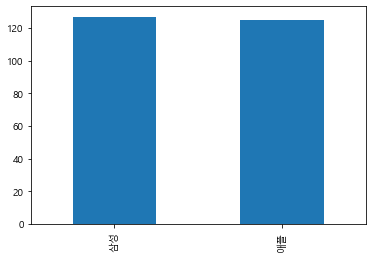

In [25]:
%matplotlib inline
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind='bar')

<AxesSubplot:ylabel='구매장소'>

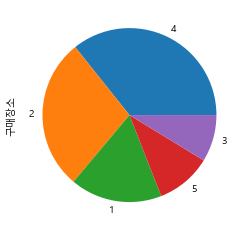

In [26]:
%matplotlib inline
df['구매장소'].value_counts().plot(kind='pie')

In [39]:
# 명목척도의 테이블표 생성
pd.crosstab(df['월수입'], df['사용브랜드']).rename(columns={1:'애플',2:'삼성'})

사용브랜드,애플,삼성
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [20]:
a = pd.crosstab(df['월수입'], df['사용브랜드']).values
a

array([[20, 13],
       [14, 22],
       [28, 24],
       [20, 17],
       [12, 28],
       [33, 21]], dtype=int64)

In [27]:
chisquare(df['월수입'],df['사용브랜드'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.4748010610079576

In [28]:
pd.crosstab(df['구매장소'],df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [29]:
chisquare(df['구매장소'], ddof=[0,1])

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

## 2. T-test

In [6]:
mean = df['구매가격'].values
mean1 = df.loc[df['사용브랜드']==1,'구매가격'].values
mean2 = df.loc[df['사용브랜드']==2,'구매가격'].values

C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


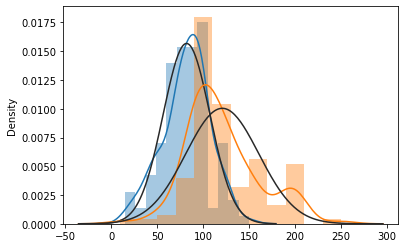

In [10]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
sp.stats.shapiro(mean1)
plt.show()

In [56]:
# 등분산 검정 : null hypothesis(귀무가설)가 수락되야 함.
# null hypothesis가 기각되면 등분산성을 이루지 않음. 
# alternative hypothesis(대립가설)의 수락
sp.stats.levene(mean1, mean2)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [57]:
# 등분산성 위배 조건 설정.
# 그럼에도 불구하고 p-value 결과에 의해 두 집단간 유의한 차이가 있음.
stats.ttest_ind(mean1, mean2, equal_var=False)

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)